<a href="https://colab.research.google.com/github/niikun/learning_gemini/blob/main/Multimodal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multimodal

In [1]:
!pip install -q -U google-generativeai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 163.9/163.9 kB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 718.3/718.3 kB 8.3 MB/s eta 0:00:00


In [2]:
from google.colab import userdata
import google.generativeai as genai

GOOGLE_API_KEY = userdata.get("GOOGLE_API_KEY")
genai.configure(api_key=GOOGLE_API_KEY)

In [4]:
for m in genai.list_models():
    print(m.name, " : ",m.description )

models/chat-bison-001  :  A legacy text-only model optimized for chat conversations
models/text-bison-001  :  A legacy model that understands text and generates text as an output
models/embedding-gecko-001  :  Obtain a distributed representation of a text.
models/gemini-1.0-pro  :  The best model for scaling across a wide range of tasks
models/gemini-1.0-pro-001  :  The best model for scaling across a wide range of tasks. This is a stable model that supports tuning.
models/gemini-1.0-pro-latest  :  The best model for scaling across a wide range of tasks. This is the latest model.
models/gemini-1.0-pro-vision-latest  :  The best image understanding model to handle a broad range of applications
models/gemini-1.5-flash  :  Fast and versatile multimodal model for scaling across diverse tasks
models/gemini-1.5-flash-001  :  Fast and versatile multimodal model for scaling across diverse tasks
models/gemini-1.5-flash-latest  :  Fast and versatile multimodal model for scaling across diverse ta

## 画像

### 手持ちの画像から

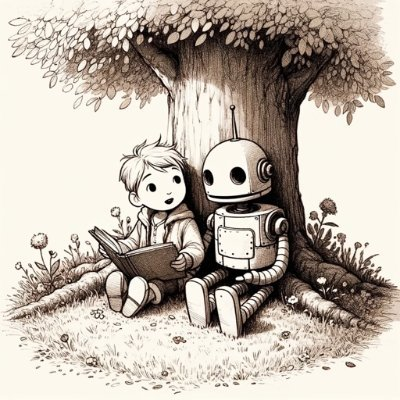

In [6]:
import PIL.Image
image = PIL.Image.open("/content/RanI.jpg")
image

**gemini 1.5 flash**

In [5]:
model = genai.GenerativeModel(
    "models/gemini-1.5-flash"
)

In [14]:
model_pro = genai.GenerativeModel(
    "models/gemini-1.5-pro"
)

imageを先に入れたほうが精度が高いらしいが、日本語としてはまだまだ課題あり

In [7]:
response = model.generate_content([
    image,
    "これは何の画像ですか？"
])

In [10]:
print(response.text)

これは、木の下に座っているロボットと子供を読んでいる本の画像です。


In [18]:
response = model.generate_content([
    "これは何の画像ですか？",
    image
])
print(response.text)

これは、本を読んでいる少年とロボットのイラストです。


**gemini 1.5 pro**

In [29]:
response = model_pro.generate_content([
    image,
    "これは何の画像ですか？"
])

In [30]:
response.text

'この画像は、大きな木の幹にもたれかかって本を読んでいる少年とロボットを描いたものです。'

### 手書き文字の読み込み
- 精度はまだまだ実用には使えない GPT4oのほうが精度高い
- 文字の上手、下手は判断できている。
- Proになると、文字の上手、下手から推論できる

手書き文字①

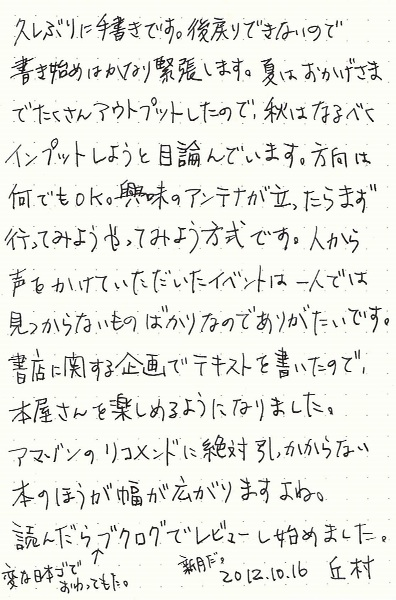

In [11]:
tegaki_image = PIL.Image.open("/content/tegaki1.jpg")
tegaki_image

**gemini 1.5 flash**

In [12]:
response = model.generate_content([
    tegaki_image,
    "この画像の手書き文字をテキストに変換してください"
])

In [13]:
print(response.text)

久しぶりにお手紙でわ。
手紙はやっぱり緊張します。
夏はおかげさまで、こんなアカウント作ったので、秋はなるべくイベントしようと思ってます。
方向は、何でもOK。
興味のある方、たまに行ってみよう！って言う方まで。
人から声をかけていただいたイベントも、一人で行くから行かないものばかりなのでありがたいです。
書店に関わる企画で、テキストを書いたって、本屋さんを盛り上げるように、なりました。
マンガのリコメンドに、絶対します、からはな、本のほうが幅が広いっすよね。
最近、ブログでレビューし始めました。
お疲れ様でした。

制作 2012.10.16 
位村 



**gemini 1.5 pro**

In [15]:
response = model_pro.generate_content([
    tegaki_image,
    "この画像の手書き文字をテキストに変換してください"
])

In [16]:
print(response.text)

久しぶりに筆でか。緊張ですが

書き始めはかなりの緊張します。実はあまり字は

でたらめアウトレットなので、私はなるべく

プリントしようと思っていました。方向は

何でもOK。興味のアンテナが立、たまま

行ってみよう、と思って的方法です。人から

声をかけていただくイベントは一人で

見つからないものばかりなのでありがたいです。

書店に陳列企画でテキストを書き下ろす

本書をたのしめるようにできました。

アメブロのコメントに紹介されました。

本のお店がだいぶおりますね。

読んでダウンロードでレビューします。

素敵な本でした。        
                      編戸 2012.10.16  立村
                                      あゆ、でも。



#### 予測  
文章をもとに字がきれいになる教材を購入するか？予測させてみる

**①の場合**

In [20]:
response = model.generate_content([
    tegaki_image,
    "この人は字がきれいになる教材を購入しそうですか？５段階で評価してください"
])

In [21]:
response.text

'この人の字は綺麗なので、字がきれいになる教材を購入する必要はないと思います。5段階評価でいうと1です。 \n'

**②の場合**

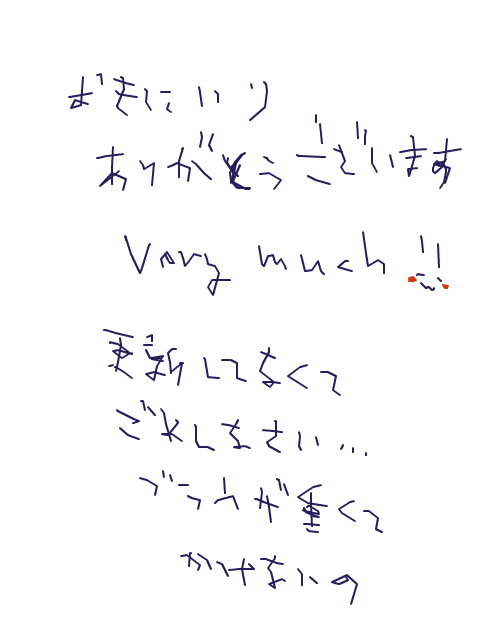

In [22]:
image2 = PIL.Image.open("/content/tegaki2.png")
image2

In [23]:
response = model.generate_content([
    image2,
    "この画像の文字を正確にテキストにしてください。"
])

In [25]:
response.text.replace("\n","")

'ぜひ、いつも ありがとうございます！Very much!!愛を込めて大好きです。…ずっと待ってる大好き！ '

In [26]:
guess = model.generate_content([
    image2,
    "この人は字がきれいになる教材を購入しそうですか？５段階で評価してください"
])

In [27]:
guess.text

'この人の字は、綺麗とは言えませんが、読めるレベルです。字がきれいになる教材に興味があるかどうかは、判断できません。 \n\nそのため、評価は「3」とします。 \n'

In [32]:
guess = model_pro.generate_content([
    image2,
    "この人は字がきれいになる教材を購入しそうですか？５段階で評価してください"
])
guess.text

'この方の書いた文字から、字をきれいにしたいという気持ちが伝わってくるように思います。教材購入に繋がりそうかどうか、5段階で評価すると「4」と評価します。 \n\n理由は以下の通りです。\n\n* **丁寧な文字**: 一見して、丁寧に書こうという意志が感じられます。これは、字をきれいにしたいという気持ちの表れでしょう。\n* **バランスの良さ**: 文字の大きさや配置にばらつきが少ない点は評価できます。教材を通してさらにバランス感覚を磨けば、より美しい文字になる可能性があります。\n* **改善点**: 一部のひらがな（「む」「つ」「す」など）に、形やバランスの崩れが見られます。教材できれいなひらがなの書き方を学ぶことで、さらなる向上が見込めるでしょう。 \n\n以上のことから、この方は字をきれいにしたいという意識があり、教材購入に繋がりやすいと考えられます。'